# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 11, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Guoda Paulauskaite 12255076 & Chayenne Olumuyiwa 12055662

YOUR ANSWER HERE

# About imports
Please import the needed packages by yourself.

In [21]:
from scipy.integrate import quad as integral
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#predefine global variable for part c
f_evals = 0

# Exercise 1
N.B.1 tentative points for each part are: 2+1.5+2+2+1.5 (and one point for free gives 10).

N.B.2 you are to implement the methods yourself.

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 
## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

In [23]:
def x_to_minus3(x):
    '''Computes y = x^(-3).
    Input: x, scalar value.
    Output: y, scalar value.'''
    global f_evals
    f_evals += 1
    return x**(-3)

def TrapezoidApprox(f, a, b, m):
    '''Computes an approximation of an integral using composite trapezoid rule.
    Inputs: function f to be approximated, lower limit a, upper limit b, number of subintervals k.
    Output: T_m, the approximation of the integral of function f between a and b.'''
    h = (b-a)/m
    
    #Initiate composite trapezoid
    rule with k subintervals
    T_k = 0.5*f(a) + 0.5*f(b)
    
    for i in range(1, m):
        x_i = a + i*h
        T_k += f(x_i)
      
    T_k *= h
    return T_k

In [24]:
#Apply trapezoid rule
a, b = 0.1, 100
k = 1
m = 2**k
error_tolerance = 10**(-3)
exact_integral, _ = integral(x_to_minus3, a, b)
print(f'Exact intergral value is: {exact_integral}')
error = abs(exact_integral - TrapezoidApprox(x_to_minus3, a, b, m)) #init error value

#Search for smallest k value that gives sufficiently small error
while error >= error_tolerance:
    k += 1
    m = 2**k
    error = abs(exact_integral - TrapezoidApprox(x_to_minus3, a, b, m))
#     print(f'k is {k}, error is {error}, Approx: {TrapezoidApprox(x_to_minus3, a, b, m)}')

print(f'Final k is {k}; error is {error}; Approx: {TrapezoidApprox(x_to_minus3, a, b, m)}')


Exact intergral value is: 49.99994999999998
Final k is 18; error is 0.00036306889014525723; Approx: 50.00031306889012


Text(0, 0.5, 'y')

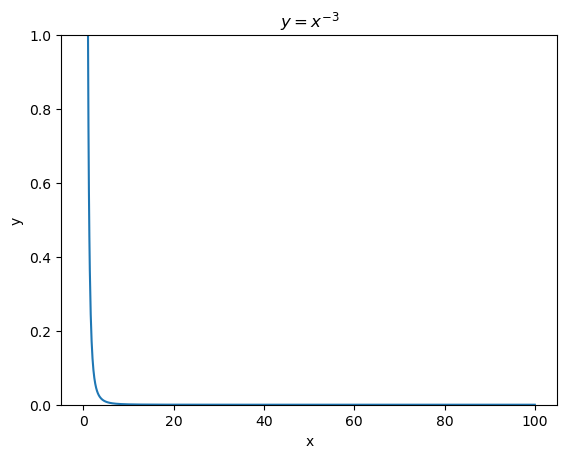

In [25]:
#Investigate slow convergence by plotting
x = np.linspace(a, b, 1000)
plt.ylim(0, 1)
plt.plot(x, x**(-3))
plt.title('$y = x^{-3}$')
plt.xlabel('x')
plt.ylabel('y')

The function $f(x) = x^{-3}$ approaches infinity around $x = 0$ which means at the lower limit $a$ the function increases rapidly which poses problems for the trapezoid rule as this complex behaviour is difficult to capture for small $k$ values. Trapezoid rule relies on linear rapproximations and is particularly sensitive to such rapid changes such that determining a sufficient number of subintervals poses a challenge.

## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$\begin{aligned}
I_1(f,a,b) = {}& T(f,a,b,1) \\
I_2(f,a,b) = {}& T(f,a,b,2) .
\end{aligned}$$
Show, based on the error estimates for the trapezoid rule using the Taylor series (book example 8.2) that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).

## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

In [26]:
def AdaptiveTrapezoid(f, a, b, error_tolerance):
    '''Uses an adaptive trapezoid approach to compute the integral of function f
    between a and b with some allowed error tolerance.
    Input: function f, lower limit a, upper limit b, error tolerance.
    Output: Integral approximation of function f between a and b.  
    '''
    global f_evals
    f_evals += 1
    
    I2 = TrapezoidApprox(f, a, b, 2)
    I1 = TrapezoidApprox(f, a, b, 1)
    E2 = 0.5 * (I1 - I2)
    
    if abs(E2) <= error_tolerance:
        return I2
    else:
        #Split the integral
        c = (a + b) / 2
        left_half = AdaptiveTrapezoid(f, a, c, error_tolerance / 2)
        right_half = AdaptiveTrapezoid(f, c, b, error_tolerance / 2)
        return left_half + right_half 

In [27]:
a, b = 0.1, 100
error_tolerance = 10**(-3)
exact_integral, _ = integral(x_to_minus3, a, b)
adaptive_approx = AdaptiveTrapezoid(x_to_minus3, a, b, error_tolerance)

error = abs(exact_integral - adaptive_approx)
print(f'Error: {error}; Exact value: {exact_integral}; Approximation: {adaptive_approx}')

Error: 0.0001887918220191409; Exact value: 49.99994999999998; Approximation: 50.000138791821996


## (d)
Modify the code of (c) so that the number of function evaluations is counted and that no unnecessary function evaluations are performed. Compare the number of function evaluations used in the adaptive strategy of (c) with the result of (a). 
(*Hint*: To count the number of function evaluations, you may use a global variable that is incremented by the function each time it is called.)

In [31]:
a, b = 0.1, 100
error_tolerance = 10**(-3)

#Regular trapezoid rule function evaluations
f_evals = 0
k = 18
m = 2**k
TrapezoidApprox(x_to_minus3, a, b, m)
f_evals_a = f_evals

#Adaptive trapezoid rule function evaluations
f_evals = 0
AdaptiveTrapezoid(x_to_minus3, a, b, error_tolerance)
f_evals_c = f_evals

#Compare
print(f'Regular trapezoid rule function evaluations: {f_evals_a}')
print(f'Adaptive trapezoid rule function evaluations: {f_evals_c}')
print(f'The ratio is {f_evals_a/f_evals_c:.2f}')


Regular trapezoid rule function evaluations: 262145
Adaptive trapezoid rule function evaluations: 71394
The ratio is 3.67


The result we found in (a) requires around 3.67 times more function evaluations as compared to the adaptive approach in (c). 

## (e)
In the course of executing the recursive procedure, some subintervals are refined (split in two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient in the sense that they require less function evaluations (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Discuss briefly possible alternative approaches.


Other algorithms may sample subintervals differently instead of halving them every time like in our adaptive approach. Instead, subintervals can be sampled smarter. For instance, smaller (and more) subintervals can be taken in parts of the function where the integral is difficult to compute (for instance, in the asymptotic case close to x = 0 in $x^{-3}$. However, larger and fewer intervals can be taken in parts of the function where the integral is easy to compute (for instace the long tail of $x^{-3}$). This approach is called adaptive quadrature where we start with a few intervals and compute the error estimates. Then, we refine intervals with large errors (split intervals and recompute).